In [1]:
import sklearn.datasets

In [3]:
sklearn.datasets.load_digits()

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [4]:
X_train = sklearn.datasets.load_digits().data
y_train = sklearn.datasets.load_digits().target

In [5]:
import sklearn.cross_validation as cv

C:\Users\Admin.Ann-s\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
cv.cross_val_score(cv=10).mean()

In [6]:
from sklearn import tree 

In [7]:
clf = tree.DecisionTreeClassifier()

In [8]:
a = cv.cross_val_score(clf, X_train, y_train, cv=10).mean()

In [9]:
a

0.82865346723555677

In [10]:
import sklearn.ensemble

In [13]:
import math

In [11]:
bc = sklearn.ensemble.BaggingClassifier(clf,n_estimators=100)

In [12]:
b = cv.cross_val_score(bc, X_train, y_train, cv=10).mean()
b

0.92272301334803442

In [14]:
bc2 = sklearn.ensemble.BaggingClassifier(clf,n_estimators=100,  max_features = math.sqrt(1.0))

In [15]:
c = cv.cross_val_score(bc2, X_train, y_train, cv=10).mean()
c

0.92327505684979916

In [20]:
clf2 = tree.DecisionTreeClassifier(splitter = 'random')
bc3 = sklearn.ensemble.BaggingClassifier(clf2,n_estimators=100,  max_features = math.sqrt(1.0), bootstrap = False)

In [21]:
d = cv.cross_val_score(bc3, X_train, y_train, cv=10).mean()
d

0.9594513549556094

In [27]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
e = cv.cross_val_score(rf, X_train, y_train, cv=10).mean()
e

0.92030550528978305

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin.Ann-s\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
trees = {1,3,5,10,25, 50,100,150,200}
features = {0.1, 0.3, 0.5, 0.7, 0.9, 1.0}
depth= {10,30,50,100,200,500}

In [35]:
storage= []
for tree in trees:
    rf2 = sklearn.ensemble.RandomForestClassifier(n_estimators=tree)
    rf2.fit(X_train,y_train)
    storage.append(cv.cross_val_score(rf2, X_train, y_train, cv=10).mean())

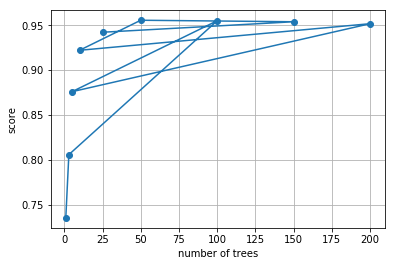

In [47]:
pylab.grid(True)
pylab.plot(list(trees), storage, marker='o')
pylab.xlabel('number of trees')
pylab.ylabel('score')

In [48]:
storage2= []
for feature in features:
    rf3 = sklearn.ensemble.RandomForestClassifier(max_features=feature)
    rf3.fit(X_train,y_train)
    storage2.append(cv.cross_val_score(rf3, X_train, y_train, cv=10).mean())

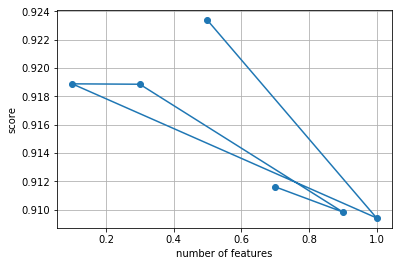

In [49]:
pylab.grid(True)
pylab.plot(list(features), storage2, marker='o')
pylab.xlabel('number of features')
pylab.ylabel('score')

In [53]:
storage3= []
for deep in depth:
    rf4 = sklearn.ensemble.RandomForestClassifier(max_depth=deep)
    rf4.fit(X_train,y_train)
    storage3.append(cv.cross_val_score(rf4, X_train, y_train, cv=10).mean())

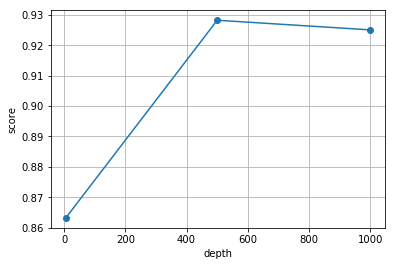

In [54]:
pylab.grid(True)
pylab.plot(list(depth), storage3, marker='o')
pylab.xlabel('depth')
pylab.ylabel('score')